线性SVM分类报告：
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       213
           1       0.79      0.70      0.74       267

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480

多项式核函数SVM分类报告：
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       213
           1       0.79      0.75      0.77       267

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480

RBF核函数SVM分类报告：
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       213
           1       0.80      0.73      0.76       267

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75

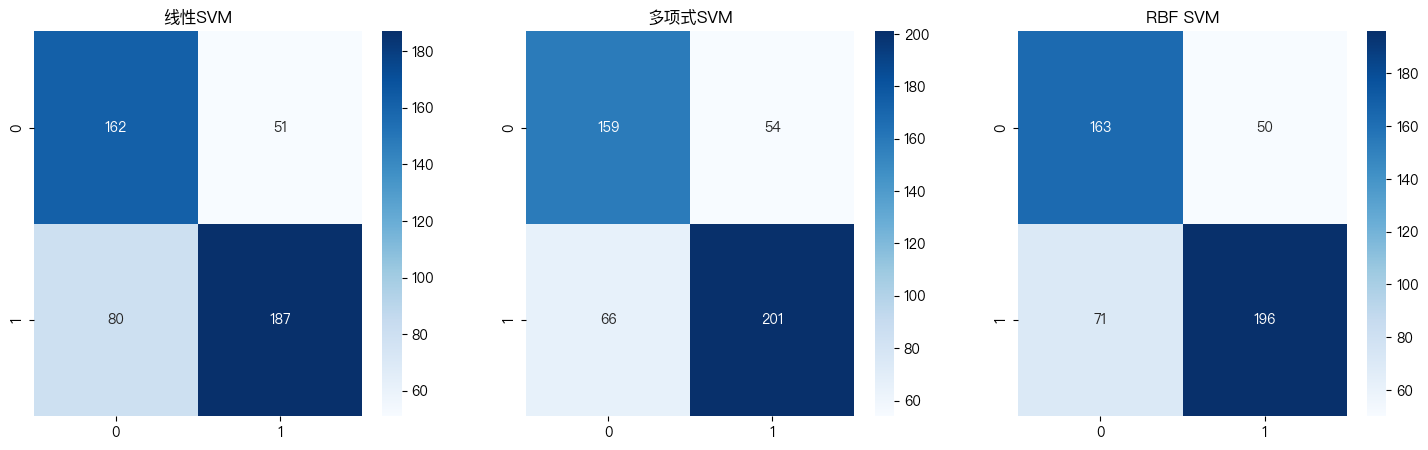

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
data = pd.read_csv('winequality-red.csv', sep=';')

# 数据预处理
X = data.drop('quality', axis=1)
y = data['quality'].apply(lambda x: 1 if x >= 6 else 0)  # 二分类

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 线性SVM
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("线性SVM分类报告：")
print(classification_report(y_test, y_pred_linear))

# 多项式核函数SVM
poly_svm = SVC(kernel='poly', degree=3, C=1)
poly_svm.fit(X_train, y_train)
y_pred_poly = poly_svm.predict(X_test)

print("多项式核函数SVM分类报告：")
print(classification_report(y_test, y_pred_poly))

# RBF核函数SVM
rbf_svm = SVC(kernel='rbf', gamma='scale', C=1)
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

print("RBF核函数SVM分类报告：")
print(classification_report(y_test, y_pred_rbf))

# 混淆矩阵
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('线性SVM')

sns.heatmap(confusion_matrix(y_test, y_pred_poly), annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('多项式SVM')

sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Blues', ax=ax[2])
ax[2].set_title('RBF SVM')

plt.show()

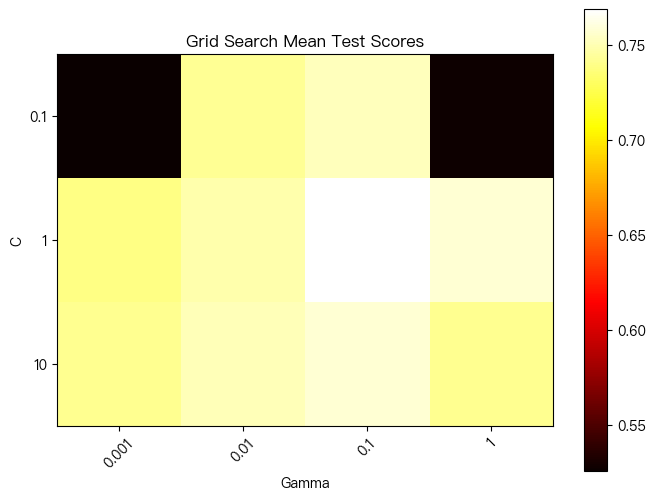

最佳参数: {'C': 1, 'gamma': 0.1}
最佳得分: 0.768613869314542
在测试集上的准确率: 0.75625
分类报告：
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       213
           1       0.80      0.74      0.77       267

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# 加载红酒品质数据集
wine_data = pd.read_csv('winequality-red.csv', sep=';')

# 准备数据
X = wine_data.drop('quality', axis=1)
y = (wine_data['quality'] >= 6).astype(int)  # 将质量评分转换为二分类标签

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 定义参数网格
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1]}

# 初始化SVM模型（使用RBF核函数）
svm_rbf = SVC(kernel='rbf')

# 使用网格搜索进行参数调优
grid_search = GridSearchCV(estimator=svm_rbf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 提取网格搜索结果
results = grid_search.cv_results_
C_values = param_grid['C']
gamma_values = param_grid['gamma']
scores = np.array(results['mean_test_score']).reshape(len(C_values), len(gamma_values))

# 绘制热力图
plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('Gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_values)), gamma_values, rotation=45)
plt.yticks(np.arange(len(C_values)), C_values)
plt.title('Grid Search Mean Test Scores')
plt.show()

# 输出最佳参数和最佳得分
print("最佳参数:", grid_search.best_params_)
print("最佳得分:", grid_search.best_score_)

# 使用最佳参数重新训练模型
best_svm_rbf = grid_search.best_estimator_
best_svm_rbf.fit(X_train, y_train)

# 在测试集上评估模型性能
y_pred = best_svm_rbf.predict(X_test)
print("在测试集上的准确率:", accuracy_score(y_test, y_pred))
print("分类报告：")
print(classification_report(y_test, y_pred))